# Evaluation des paramètres à choisir pour le modèle word2vec de Google

In [90]:
import os 
os.chdir('C:/Users/Kim Antunez/Documents/Projets_autres/StatApp/Redaction/Rapport_Final/Brouillons/Kim/Analyse_resultats_python')
%run evaluation_Kim_100k.py
os.chdir('C:/Users/Kim Antunez/Documents/Projets_autres/StatApp/Redaction/Rapport_Final/Brouillons/Kim/Analyse_resultats_python')
%run evaluation_Kim_ens.py

## Nombre d'epochs, learning rate et window

On lance sur l'ensemble des tweets avec une dimension des word-embedding de 50 et on mesure la corrélation entre le human judgement et la similarité cosinus.

On teste ici : 

- **le nombre d'épochs** : Il y a un net effet du nombre d'époch : passer de 10 à 100 epochs fait augmenter le score de corrélation. 
- **le learning-rate** : Le learning-rate 0.02 semble donner systématiquement de meilleurs résultats que 0.01
- **la window** : La taille de la window ne semble pas jouer un rôle majeur, il dépend beaucoup des autres paramètres choisis. Pour 100 epoch et un learning rate de 0.02, c'est la taille de fenêtre simple qui semble en moyenne donner le meilleur résultat mais ce résultat n'est pas significativement meilleur que les autres. 

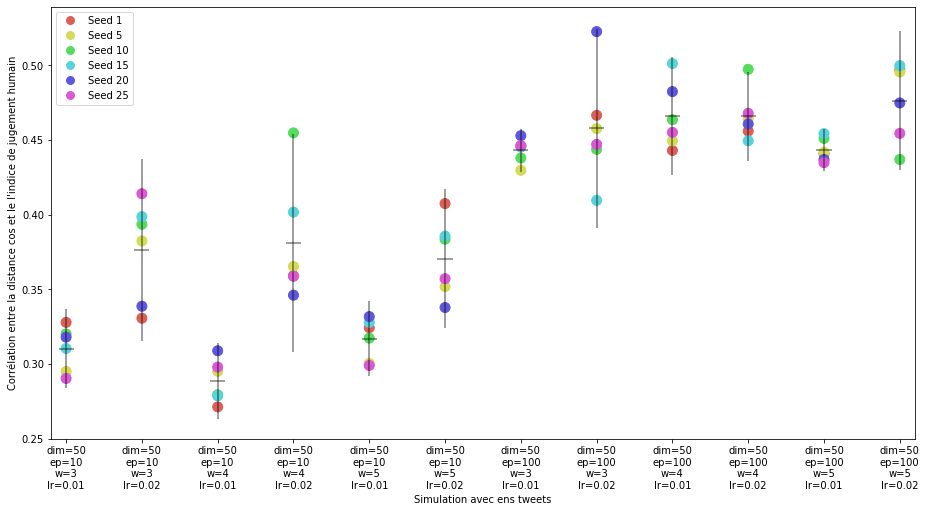

In [92]:
intervalles_confiance(res_ens)

En faisant tourner une nouvelle fois le modèle sur seulement 100 000 tweets pour voir si les résultats de choix du modèles sont aussi clairs avec moins de tweets, les effets observés sur l'ensemble des tweets se confirment. 


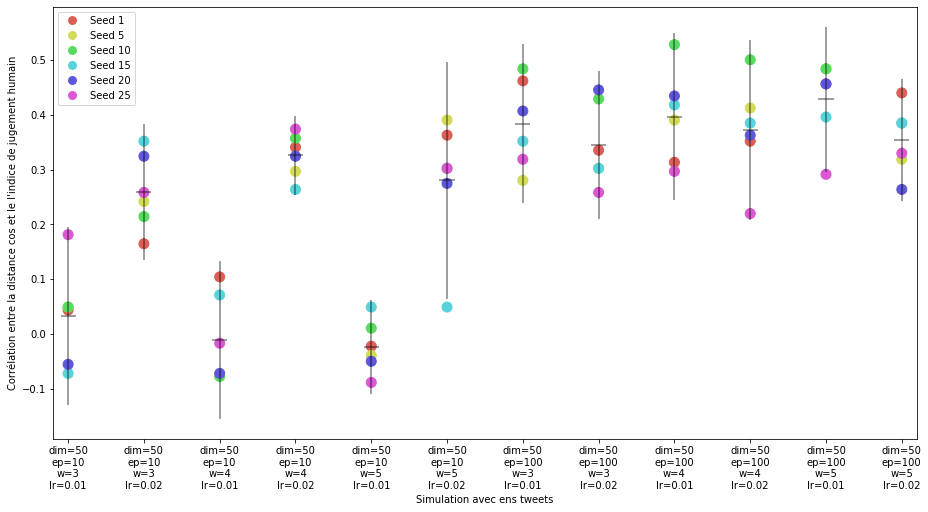

In [93]:
intervalles_confiance(res_100k) 

En faisant tourner une nouvelle fois le modèle sur l'ensemble des tweets mais avec des word-embedding de dimension 20, 
les effets observés sur l'ensemble des tweets se confirment encore une nouvelle fois ! 


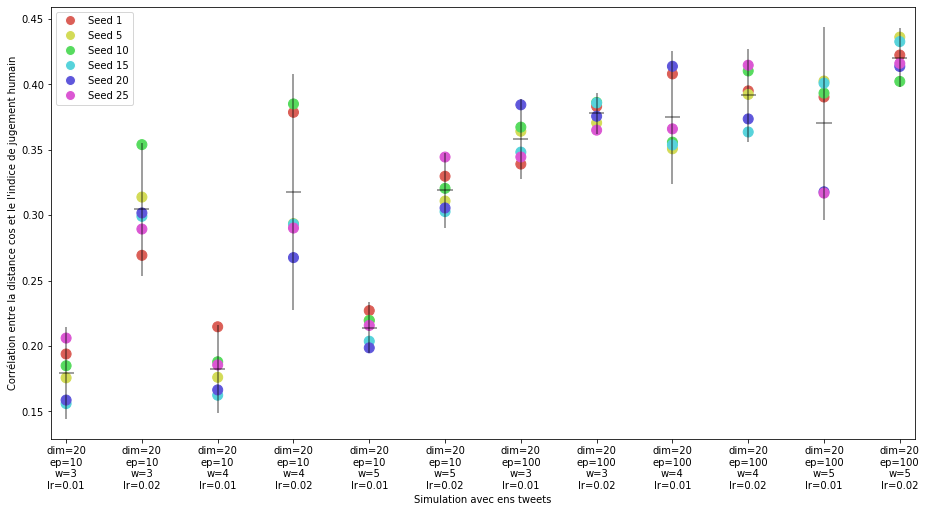

In [82]:
intervalles_confiance(res_ens_dim20)

## Dimension des vecteurs-mots

On cherche cette fois-ci à évaluer l'effet de la dimension des web-embedding. Augmenter la dimension permettrait de projeter avec plus de précision les mots dans des espaces de dimension plus grand et donc de mieux capter les relations entre les mots. En revanche, une dimension trop élevée pourrait également dégrader la qualité de la projection vectorielle en rajoutant plus de bruit. En pratique, 
pour toutes les combinaisons de paramètres, on observe une amélioration des résultats obtenus en dimension 50 par rapport en dimension 20. 


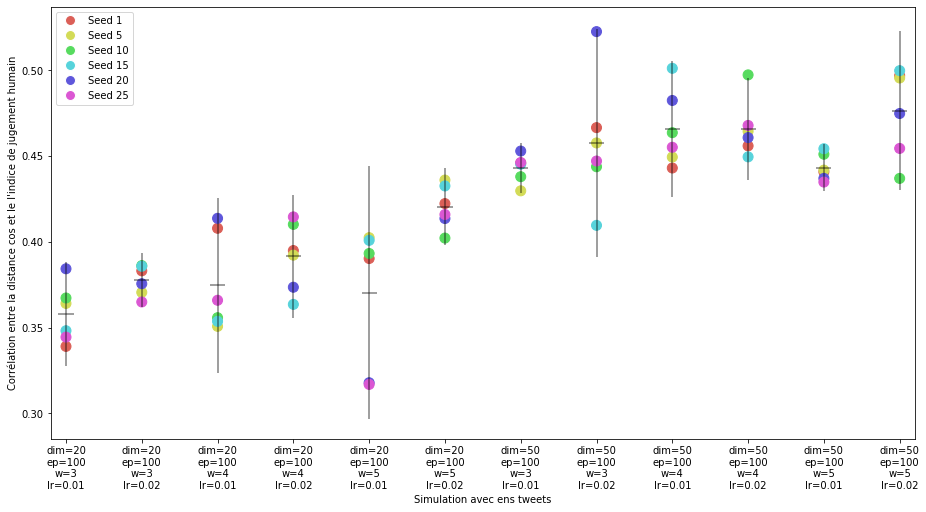

In [83]:
intervalles_confiance(res_ens_dim20_50)

## Evaluation avec la distance euclidienne et non la dissimilarité cosinus ? 

On cherche cette fois-ci à voir l'effet de prendre (l'inverse d') une distance euclidienne (sur vecteurs normalisés) plutôt qu'une similarité cosinus. 
On remarque que cette fois-ci les résultats sont instables.

Le nombre d'epochs semble avoir aucun effet sur les résultats (étrange). 

- **le nombre d'épochs** : Il ne semble avoir aucun effet sur les résultats obtenus (étrange !)
- **le learning rate** : Le learning rate 0.02 donne bien des meilleurs résultats que 0.01 sur 10 epochs, mais sur 100, c'est l'inverse ! (étrange !)
- **la window** : Ce paramètre, comme avec la distance cosinus, n'a pas d'effet net mais le paramètre window = 4 semble donner des résultats légèrement meilleurs pour le learning rate = 0.02. 

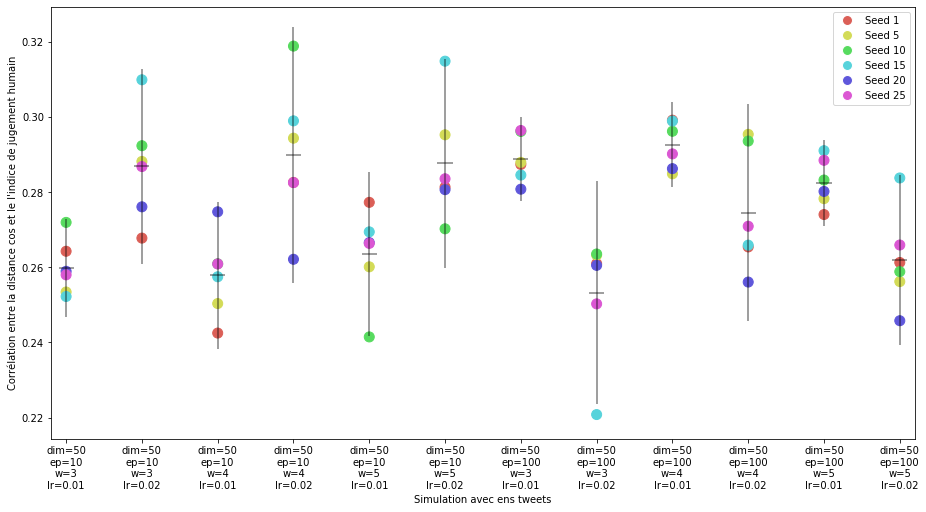

In [88]:
intervalles_confiance(res_ens_eucl)

## Conclusions

A ce stade, les conclusions nous amènent à choisir les paramètres suivants : 

- dim = 50 
- ep = le plus possible ! 
- w = 4 (rien de concluant selon nos simulations mais paramètres proches de la littérature)
- lr = 0.02

Pour aller plus loin, nous devrions également tester d'autres learning rate. En effet, le choix de ce paramètre semble influer beaucoup sur les résultats obtenus. Nous proposons deux tester d'autres valeurs, en particulier 0.005 et 0.03. 

De même, il serait intéressant d'analyser les résultats pour des dimensions supérieures à 100, afin de voir si, à partir d'une certaine taille de word-embedding, les résultats finissent par se dégrader. 

